In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your files
before = pd.read_csv(r"E:\Network labs\city_filter\cities_business_count.csv")
after = pd.read_csv(r"E:\Network labs\city_filter\city_bussiness_count.csv")

# Clean up column names (remove any leading/trailing spaces)
before.columns = before.columns.str.strip()
after.columns = after.columns.str.strip()

# Print column names to confirm
print("Before columns:", before.columns)
print("After columns:", after.columns)

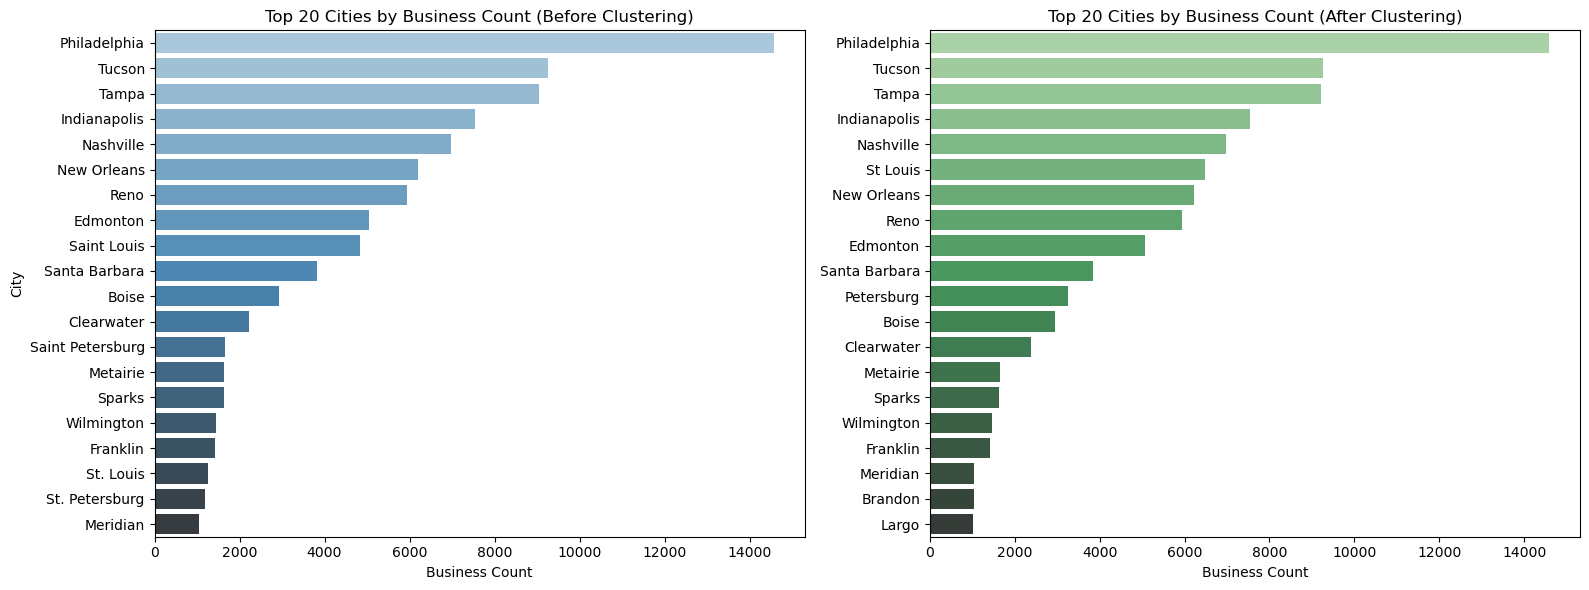

In [7]:
# Sort and get top 20 cities by business count
top20_before = before.sort_values(by='business_count', ascending=False).head(20)
top20_after = after.sort_values(by='business_count', ascending=False).head(20)

plt.figure(figsize=(16, 6))

# Before Clustering
plt.subplot(1, 2, 1)
sns.barplot(data=top20_before, y='city', x='business_count', hue='city', legend=False, palette='Blues_d')
plt.title("Top 20 Cities by Business Count (Before Clustering)")
plt.xlabel("Business Count")
plt.ylabel("City")

# After Clustering
plt.subplot(1, 2, 2)
sns.barplot(data=top20_after, y='city_name', x='business_count', hue='city_name', legend=False, palette='Greens_d')
plt.title("Top 20 Cities by Business Count (After Clustering)")
plt.xlabel("Business Count")
plt.ylabel("")

plt.tight_layout()
plt.show()


In [13]:
print(after.columns)

Index(['city_name', 'business_count'], dtype='object')


In [15]:
print(before.columns)

Index(['city', 'business_count'], dtype='object')


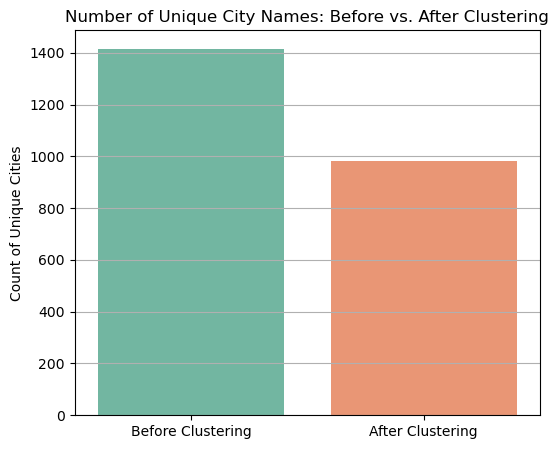

In [19]:
# Count unique cities
num_cities_before = before['city'].nunique()
num_cities_after = after['city_name'].nunique()

# Create a small dataframe for plotting
df_cities = pd.DataFrame({
    'Stage': ['Before Clustering', 'After Clustering'],
    'Unique Cities': [num_cities_before, num_cities_after]
})

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(data=df_cities, x='Stage', y='Unique Cities', hue='Stage', palette='Set2', legend=False)
plt.title("Number of Unique City Names: Before vs. After Clustering")
plt.ylabel("Count of Unique Cities")
plt.xlabel("")
plt.grid(axis='y')
plt.show()

In [23]:
after[after['city_name'].str.contains("louis", case=False, na=False)]

,city_name,business_count
51,St Louis,6489
512,St Louis Downtown,7
723,Lake Saint Louis,1
860,St Louis County,3


                   city  business_count
52          Saint Louis            4827
81            St. Louis            1255
151            St Louis             357
407           ST. Louis               1
429    East Saint Louis              16
586   St Louis Downtown               7
606            St.Louis               9
650       East St Louis               4
707      East St. Louis               4
717         Saint louis               1
738         SAINT LOUIS               3
784            St.louis               1
854           St  Louis               3
904            ST LOUIS               1
922    Lake Saint Louis               1
939         Saint Louis               1
953            St louis               1
1064      E Saint Louis               1
1131       Saint Louis                1
1161     SAINT LOUIS AP               1
1163    St Louis County               2
1273       Saint Louis,               2
1379   St. Louis County               1


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_19616\2682409332.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_compare, x='City Name', y='Business Count', palette='coolwarm')


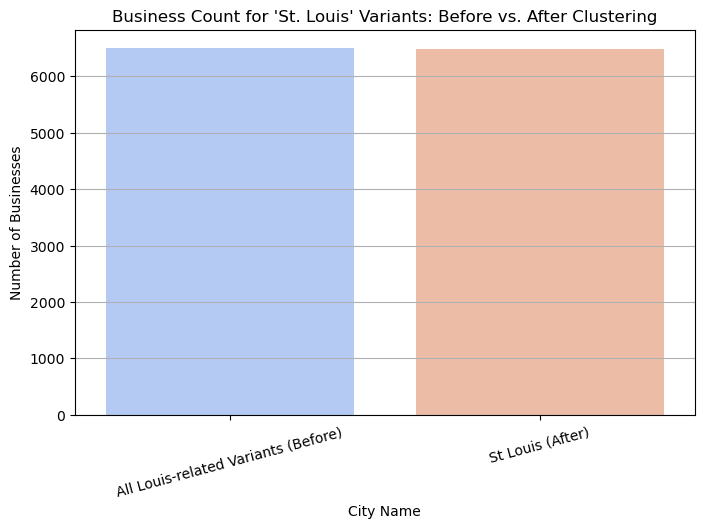

In [27]:
# 1. See all 'Louis'-related city names
louis_variants_df = before[before['city'].str.contains("louis", case=False, na=False)]
print(louis_variants_df)

# 2. Total all business counts for louis-related names
before_sum = louis_variants_df['business_count'].sum()

# 3. After clustering – use 'St Louis' only
after_count = after[after['city_name'] == 'St Louis']['business_count'].values[0]

# 4. Show a side-by-side bar chart
df_compare = pd.DataFrame({
    'City Name': ['All Louis-related Variants (Before)', 'St Louis (After)'],
    'Business Count': [before_sum, after_count]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=df_compare, x='City Name', y='Business Count', palette='coolwarm')
plt.title("Business Count for 'St. Louis' Variants: Before vs. After Clustering")
plt.ylabel("Number of Businesses")
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.show()


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSVs from your full file paths
before_combined = pd.read_csv(r"E:\Network labs\city_filter\cities_count.csv")
after_combined = pd.read_csv(r"E:\Network labs\city_filter\city_count.csv")

# View column names for both datasets
print("Before columns:", before_combined.columns)
print("After columns:", after_combined.columns)

Before columns: Index(['city', 'business_count', 'review_count'], dtype='object')
After columns: Index(['city_name', 'business_count', 'review_count'], dtype='object')


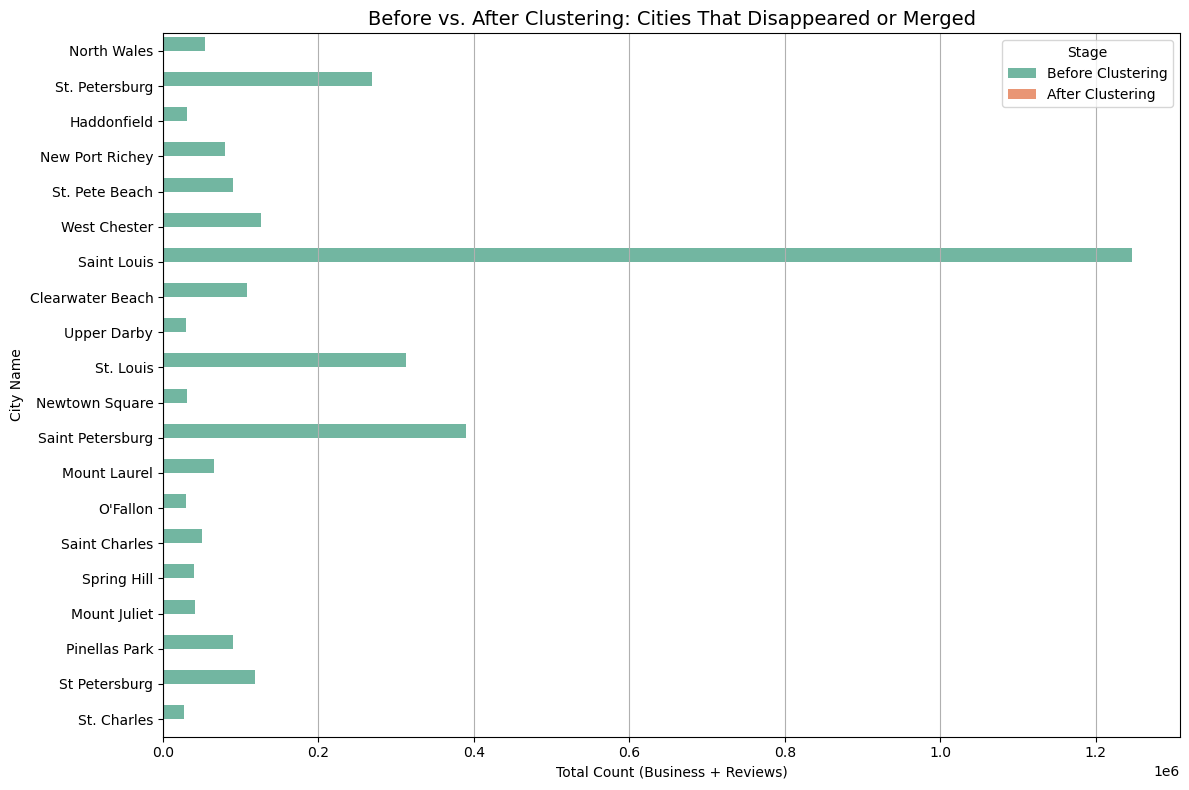

In [45]:
# Compute totals
before_combined['total'] = before_combined['business_count'] + before_combined['review_count']
after_combined['total'] = after_combined['business_count'] + after_combined['review_count']

# Normalize city names for comparison
before_combined['city_clean'] = before_combined['city'].str.lower().str.strip()
after_combined['city_name_clean'] = after_combined['city_name'].str.lower().str.strip()

# Find cities that disappeared
before_cities = set(before_combined['city_clean'])
after_cities = set(after_combined['city_name_clean'])
missing_cities = before_cities - after_cities

# Build a comparison dataframe
compare_records = []
for city in missing_cities:
    before_total = before_combined[before_combined['city_clean'] == city]['total'].sum()
    after_total = 0  # Missing after clustering
    display_name = before_combined[before_combined['city_clean'] == city]['city'].values[0]
    compare_records.append({'City': display_name, 'Stage': 'Before Clustering', 'Total': before_total})
    compare_records.append({'City': display_name, 'Stage': 'After Clustering', 'Total': after_total})

# Create a dataframe and keep top 20 lost cities
compare_df = pd.DataFrame(compare_records)
top_cities = compare_df.groupby('City')['Total'].sum().sort_values(ascending=False).head(20).index
compare_df = compare_df[compare_df['City'].isin(top_cities)]

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=compare_df, x='Total', y='City', hue='Stage', palette='Set2')
plt.title("Before vs. After Clustering: Cities That Disappeared or Merged", fontsize=14)
plt.xlabel("Total Count (Business + Reviews)")
plt.ylabel("City Name")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

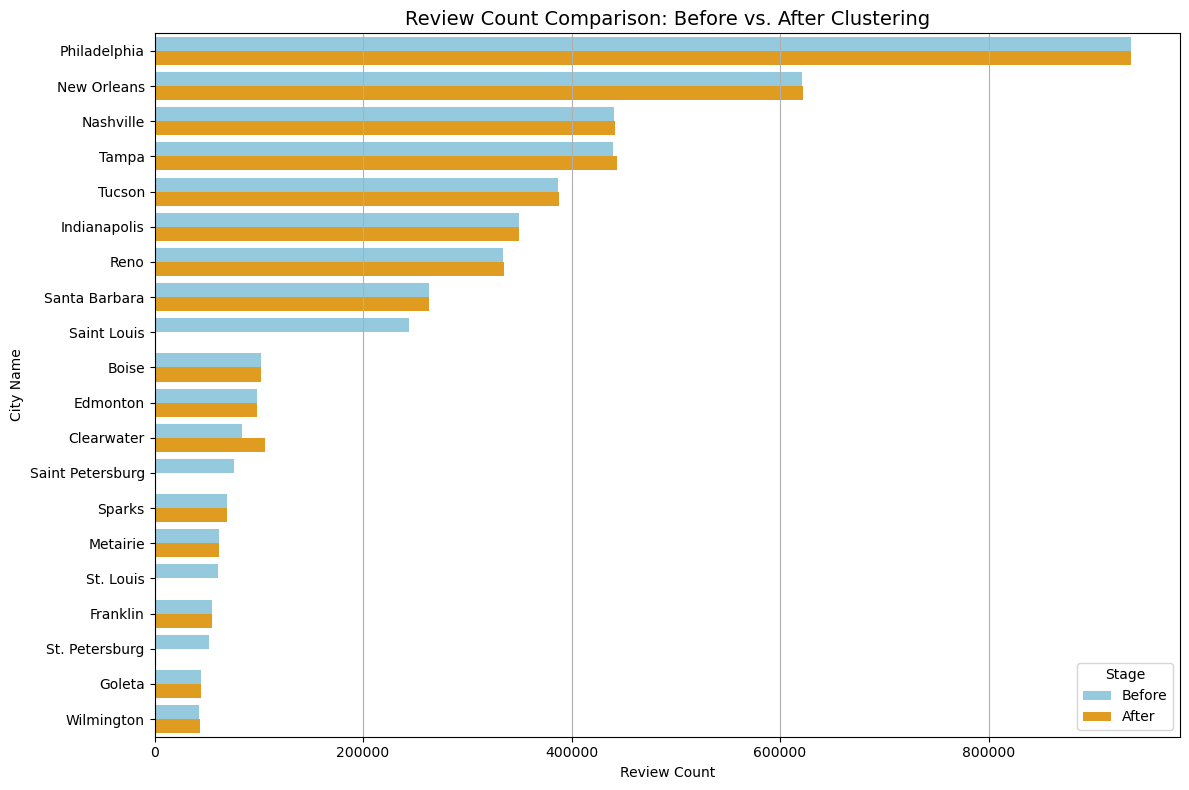

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
before_reviews = pd.read_csv(r"E:\Network labs\city_filter\cities_review_count.csv")
after_reviews = pd.read_csv(r"E:\Network labs\city_filter\city_review_count.csv")  # Adjust if needed

# Rename columns for consistency
before_reviews.rename(columns={'city': 'City', 'review_count': 'Before'}, inplace=True)
after_reviews.rename(columns={'city_name': 'City', 'review_count': 'After'}, inplace=True)

# Normalize for matching
before_reviews['City_clean'] = before_reviews['City'].str.lower().str.strip()
after_reviews['City_clean'] = after_reviews['City'].str.lower().str.strip()

# Merge the two datasets
merged_reviews = pd.merge(
    before_reviews,
    after_reviews,
    on='City_clean',
    how='outer',
    suffixes=('_Before', '_After')
)

# Fill missing review counts with 0
merged_reviews['Before'] = merged_reviews['Before'].fillna(0)
merged_reviews['After'] = merged_reviews['After'].fillna(0)

# Keep a readable city name
merged_reviews['City'] = merged_reviews['City_Before'].combine_first(merged_reviews['City_After'])

# Sort and select top cities
merged_reviews['Difference'] = merged_reviews['Before'] - merged_reviews['After']
top_diff = merged_reviews.sort_values(by='Before', ascending=False).head(20)

# Melt the DataFrame for Seaborn barplot
melted = pd.melt(top_diff, id_vars='City', value_vars=['Before', 'After'], 
                 var_name='Stage', value_name='Review Count')

# Define custom colors
custom_palette = {'Before': 'skyblue', 'After': 'orange'}

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=melted, x='Review Count', y='City', hue='Stage', palette=custom_palette)
plt.title("Review Count Comparison: Before vs. After Clustering", fontsize=14)
plt.xlabel("Review Count")
plt.ylabel("City Name")
plt.grid(axis='x')
plt.tight_layout()
plt.show()